In [162]:
import skfda
from sklearn.metrics import r2_score
import numpy as np
import rdata
import findiff
import skdatasets
from sklearn.model_selection import train_test_split
from skfda.ml.classification import KNeighborsClassifier
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import GridSearchCV, train_test_split

from skfda.datasets import fetch_growth,fetch_phoneme,fetch_tecator

from skfda.misc.hat_matrix import (
    KNeighborsHatMatrix,
    LocalLinearRegressionHatMatrix,
    NadarayaWatsonHatMatrix,
)
from skfda.ml.regression._kernel_regression import KernelRegression


# growth dataset

/var/folders/j0/_qyt9mw926xg16wkn_3xfwz80000gn/T/ipykernel_40803/1584629192.py:5: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  X.plot(group=y, group_names=categories).show()


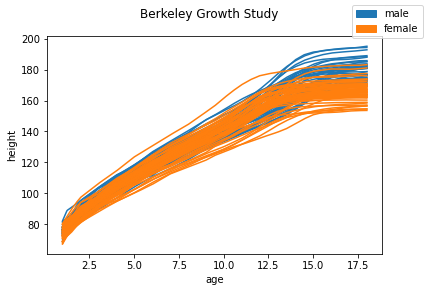

In [163]:
X, y = fetch_growth(return_X_y=True, as_frame=True)
X = X.iloc[:, 0].values
categories = y.values.categories
y = y.values.codes
X.plot(group=y, group_names=categories).show()

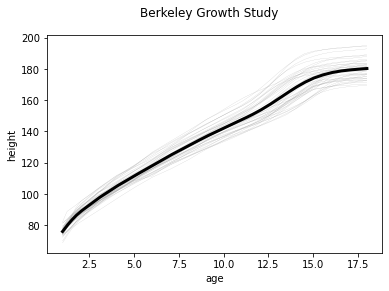

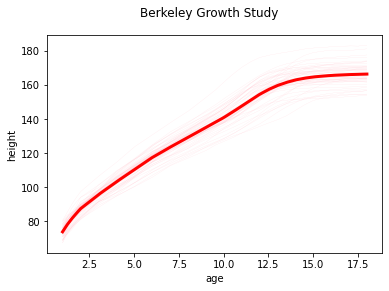

In [123]:
n_plot = len(X.data_matrix)
fig1 = X[:n_plot][y[:n_plot] == 0].plot(color = "gray",linewidth=0.1,)
fig2 = X[:n_plot][y[:n_plot] == 1].plot(color = "pink",linewidth=0.1)

X_aa = X[:n_plot][y[:n_plot] == 0]
X_ao = X[:n_plot][y[:n_plot] == 1]

X_aa.mean().plot(fig=fig1, color="black", linewidth=3)
X_ao.mean().plot(fig=fig2, color="red", linewidth=3)
plt.show()

# Phoneme dataset

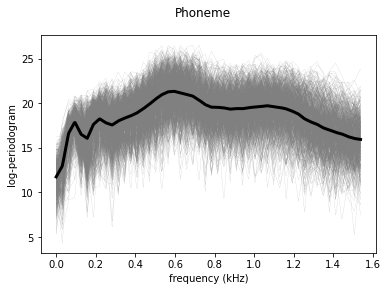

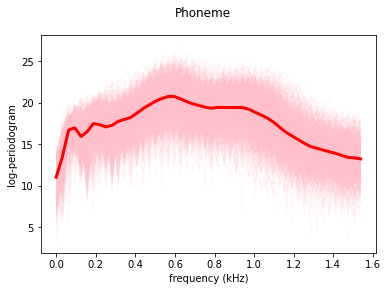

In [124]:
X, y = fetch_phoneme(return_X_y=True)

X = X[(y == 0) | (y == 1)]
y = y[(y == 0) | (y == 1)]

n_points = 50

new_points = X.grid_points[0][:n_points]
new_data = X.data_matrix[:, :n_points]

X = X.copy(
    grid_points=new_points,
    data_matrix=new_data,
    domain_range=(np.min(new_points), np.max(new_points)),
)

n_plot = len(X.data_matrix)
fig1 = X[:n_plot][y[:n_plot] == 0].plot(color = "gray",linewidth=0.1,)
fig2 = X[:n_plot][y[:n_plot] == 1].plot(color = "pink",linewidth=0.1)

X_aa = X[:n_plot][y[:n_plot] == 0]
X_ao = X[:n_plot][y[:n_plot] == 1]

X_aa.mean().plot(fig=fig1, color="black", linewidth=3)
X_ao.mean().plot(fig=fig2, color="red", linewidth=3)
plt.show()


### KNN score

In [126]:
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.2,
    random_state=1,
)
n_neighbors = np.array(range(1, 100))
knn = KNeighborsClassifier()
train_data_size = X_train.shape[0]
param_grid = {"n_neighbors": range(1, int(np.sqrt(train_data_size)), 2)}
gscv = GridSearchCV(knn, param_grid, cv=10)
gscv.fit(Xs_train, y_train)
score = gscv.score(X_test, y_test)
print("knn score :", score)

knn score : 0.7616279069767442


### Do smoothing to remove the effect of noise
by using NadarayaWatsonHatMatrix <br>
bandwidth=0.2 is a proper parameter

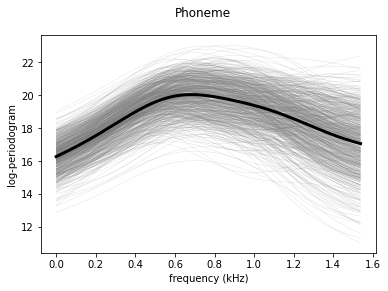

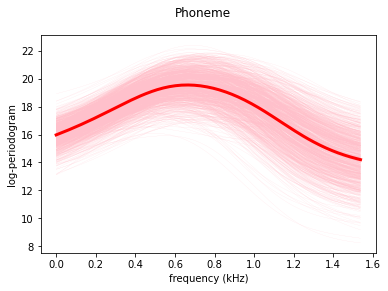

In [113]:
from skfda.preprocessing.smoothing import KernelSmoother
from skfda.misc.hat_matrix import NadarayaWatsonHatMatrix
smoother = KernelSmoother(NadarayaWatsonHatMatrix(bandwidth=0.2))
X_smooth = smoother.fit_transform(X)

fig1 = X_smooth[:n_plot][y[:n_plot] == 0].plot(color = "gray",linewidth=0.1)
fig2 = X_smooth[:n_plot][y[:n_plot] == 1].plot(color = "pink",linewidth=0.1)

X_smooth_aa = X_smooth[:n_plot][y[:n_plot] == 0]
X_smooth_ao = X_smooth[:n_plot][y[:n_plot] == 1]

X_smooth_aa.mean().plot(fig=fig1, color="black", linewidth=3)
X_smooth_ao.mean().plot(fig=fig2, color="red", linewidth=3)
plt.show()

### oversmoothing

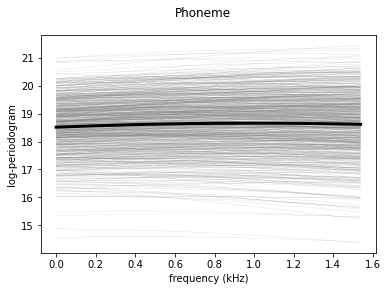

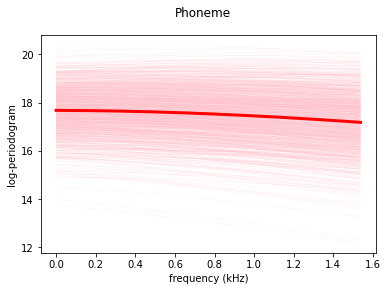

In [127]:
from skfda.preprocessing.smoothing import KernelSmoother
from skfda.misc.hat_matrix import NadarayaWatsonHatMatrix
smoother = KernelSmoother(NadarayaWatsonHatMatrix(bandwidth=1))
X_smooth = smoother.fit_transform(X)

fig1 = X_smooth[:n_plot][y[:n_plot] == 0].plot(color = "gray",linewidth=0.1)
fig2 = X_smooth[:n_plot][y[:n_plot] == 1].plot(color = "pink",linewidth=0.1)

X_smooth_aa = X_smooth[:n_plot][y[:n_plot] == 0]
X_smooth_ao = X_smooth[:n_plot][y[:n_plot] == 1]

X_smooth_aa.mean().plot(fig=fig1, color="black", linewidth=3)
X_smooth_ao.mean().plot(fig=fig2, color="red", linewidth=3)
plt.show()

In [128]:
Xs_train, Xs_test, y_train, y_test = train_test_split(
    X_smooth,
    y,
    test_size=0.2,
    random_state=1,
)
n_neighbors = np.array(range(1, 100))
knn = KNeighborsClassifier()
train_data_size = Xs_train.shape[0]
param_grid = {"n_neighbors": range(1, int(np.sqrt(train_data_size)), 2)}
gscv = GridSearchCV(knn, param_grid, cv=10)
gscv.fit(Xs_train, y_train)
score = gscv.score(Xs_test, y_test)
print("knn score :", score)

knn score : 0.7790697674418605


# Tecator dataset

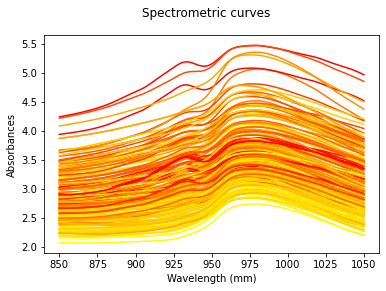

In [129]:
X, y = skfda.datasets.fetch_tecator(return_X_y=True, as_frame=True)
X = X.iloc[:, 0].values
fat = y['fat'].values
X.plot(gradient_criteria=fat, legend=True)
plt.show()

In [130]:
X_train, X_test, y_train, y_test = train_test_split(
    X,
    fat,
    test_size=0.2,
    random_state=1,
)

### KNN performs poorly on original data

In [133]:
n_neighbors = np.array(range(1, 100))
knn = GridSearchCV(
    KernelRegression(kernel_estimator=KNeighborsHatMatrix()),
    param_grid={'kernel_estimator__n_neighbors': n_neighbors},
)
knn.fit(X_train, y_train)
print(
    'KNN bandwidth:',
    knn.best_params_['kernel_estimator__n_neighbors'],
)

KNN bandwidth: 3


In [134]:
y_pred = knn.predict(X_test)
knn_res = r2_score(y_pred, y_test)
print('Score KNN:', knn_res)

Score KNN: 0.3500795818805428


### Take the first derivative of the original data

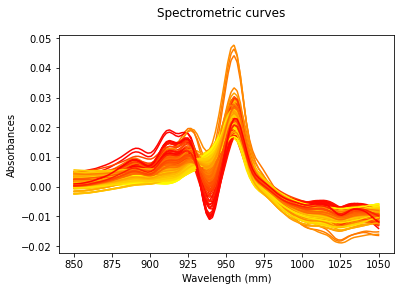

In [135]:
Xd = X.derivative()
Xd.plot(gradient_criteria=fat, legend=True)

Xd_train, Xd_test, y_train, y_test = train_test_split(
    Xd,
    fat,
    test_size=0.2,
    random_state=1,
)

In [136]:
knn = GridSearchCV(
    KernelRegression(kernel_estimator=KNeighborsHatMatrix()),
    param_grid={'kernel_estimator__n_neighbors': n_neighbors},
)

knn.fit(Xd_train, y_train)
print(
    'KNN bandwidth:',
    knn.best_params_['kernel_estimator__n_neighbors'],
)

y_pred = knn.predict(Xd_test)
dknn_res = r2_score(y_pred, y_test)
print('Score KNN:', dknn_res)

KNN bandwidth: 4
Score KNN: 0.9428247359478524


### Take the second derivative of the original data

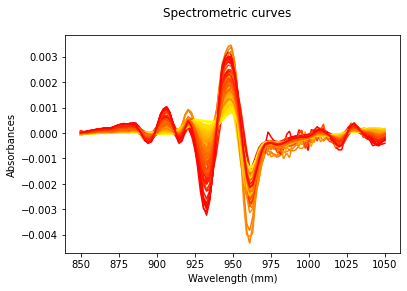

In [137]:
Xdd = X.derivative(order=2)
Xdd.plot(gradient_criteria=fat, legend=True)

Xdd_train, Xdd_test, y_train, y_test = train_test_split(
    Xdd,
    fat,
    test_size=0.2,
    random_state=1,
)

In [138]:
knn = GridSearchCV(
    KernelRegression(kernel_estimator=KNeighborsHatMatrix()),
    param_grid={'kernel_estimator__n_neighbors': n_neighbors},
)

knn.fit(Xdd_train, y_train)
print(
    'KNN bandwidth:',
    knn.best_params_['kernel_estimator__n_neighbors'],
)

y_pred = knn.predict(Xdd_test)
dknn_res = r2_score(y_pred, y_test)
print('Score KNN:', dknn_res)

KNN bandwidth: 2
Score KNN: 0.9468610025598535


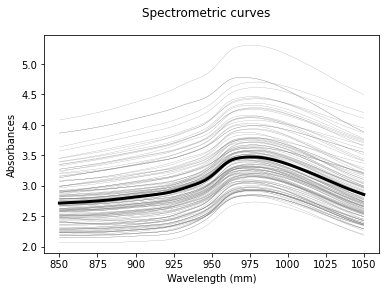

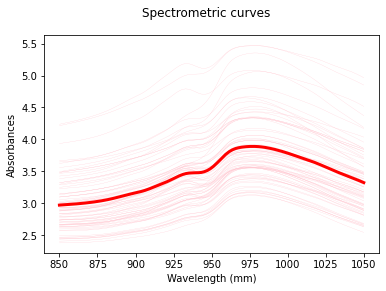

In [139]:
low_fat = fat < 20
labels = np.full(X.n_samples, 1)  # high fat = 1
labels[low_fat] = 0   #low fat = 0
n_plot = len(X.data_matrix)
fig1 = X[:n_plot][labels[:n_plot] == 0].plot(color = "gray",linewidth=0.2)
fig2 = X[:n_plot][labels[:n_plot] == 1].plot(color = "pink",linewidth=0.2)

X_low_fat = X[:n_plot][labels[:n_plot] == 0]
X_high_fat = X[:n_plot][labels[:n_plot] == 1]

X_low_fat.mean().plot(fig=fig1, color="black", linewidth=3)
X_high_fat.mean().plot(fig=fig2, color="red", linewidth=3)
plt.show()

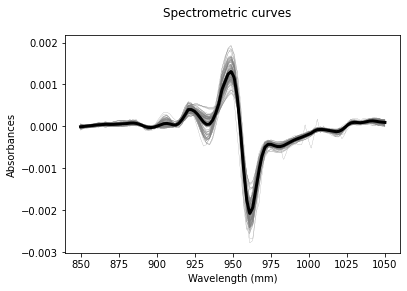

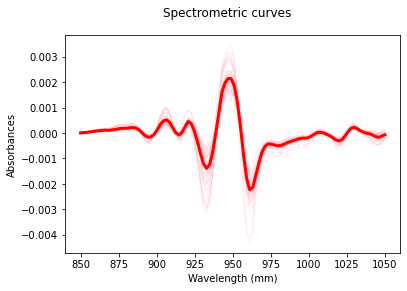

In [140]:
X, y = skfda.datasets.fetch_tecator(return_X_y=True, as_frame=True)
X = X.iloc[:, 0].values
X = X.derivative(order=2)
fat = y['fat'].values
low_fat = fat < 20
labels = np.full(X.n_samples, 1)  # high fat = 1
labels[low_fat] = 0   #low fat = 0
n_plot = len(X.data_matrix)
fig1 = X[:n_plot][labels[:n_plot] == 0].plot(color = "gray",linewidth=0.2)
fig2 = X[:n_plot][labels[:n_plot] == 1].plot(color = "pink",linewidth=0.2)

X_aa = X[:n_plot][labels[:n_plot] == 0]
X_ao = X[:n_plot][labels[:n_plot] == 1]

X_aa.mean().plot(fig=fig1, color="black", linewidth=3)
X_ao.mean().plot(fig=fig2, color="red", linewidth=3)
plt.show()

# Medflies dataset

In [160]:
X, y = skfda.datasets.fetch_medflies(return_X_y=True, as_frame=True)
X = X.iloc[:, 0].values
y = y.values
y = y.codes
n_plot = len(X.data_matrix)
len(X.data_matrix)

534

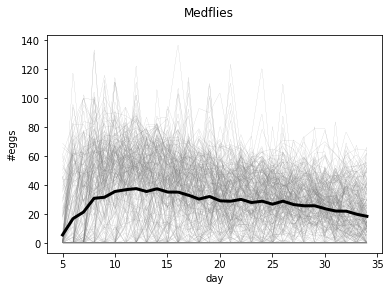

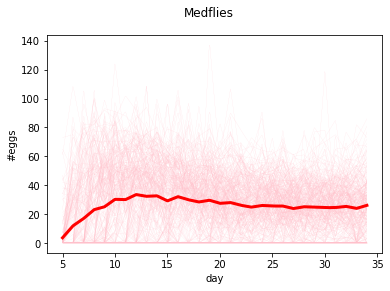

In [161]:
fig1 = X[:n_plot][y[:n_plot] == 0].plot(color = "gray",linewidth=0.1)
fig2 = X[:n_plot][y[:n_plot] == 1].plot(color = "pink",linewidth=0.1)

X_aa = X[:n_plot][y[:n_plot] == 0]
X_ao = X[:n_plot][y[:n_plot] == 1]

X_aa.mean().plot(fig=fig1, color="black", linewidth=3)
X_ao.mean().plot(fig=fig2, color="red", linewidth=3)
plt.show()